# **Tutorial 04: Practical Examples of OOP Paradigm** 👀

Computer games are quite suitable to practice **object oriented modelling** and **design**. Making simple games can demonstrate the effectiveness of **object orientation** to easily scale projects and build larger software components. In these special themed mini-projects, we will develop simple games using **object oriented approach**.

<br><br><a id='t1cls'></a>
## ▙▂ **Part 2: Blackjack Game ▂▂**

In the second mini-project, we will practice more with inheritance and method overriding. We will show how to design and build blackjack game components, such as card, then deck and finally hand. Combining those with the 'abstract' class `Game` from the previous mini-project, we will make a console based blackjack game.

<a id='t4p2toc'></a>
#### Contents: ####
- [`Card` Class and Card Constants](#t4p2card)
    - [Test and Experiment](#t4p2tecard)
- [`Deck` Class](#t4p2deck)
    - [Test and Experiment](#t4p2tedeck)
- [`Hand` Class](#t4p2hand)
    - [Test and Experiment](#t4p2tehand)
- [`Game` Class](#t4p2game)
- [Assembling the Pieces Together](#t4p2assembling)
- [`Blackjack` Class](#t4p2blackjack)


<a id='t4p2card'></a>
#### **▇▂ `Card` Class and Card Constants ▂▂**

We will use cards from standard 52 card deck. Each card is depicted by a suit and a rank. Card suits are: spades (♠), hearts (♥), diamonds (♦), clubs (♣).

To make printouts consistent and of same length, we will use one character to represent the suit and another character to represent the rank. For a suit, we will use the capital first letter of that suit: ```SUITS = ('S', 'H', 'D', 'C')```, while ranks will be given as: ```RANKS = ('A', '2', '3', '4', '5', '6', '7', '8', '9', 'T', 'J', 'Q', 'K')```. <br>
Note: For 10 we opted for character 'T'.

In blackjack the value of a card is determined by its rank only, so cards with ranks 2 - 9 have the same value, while every other card is worth 10 points. The only exception is the ace, which is worth either 11 points or 1 point, always what is more favourable for the player. The objective of blackjack is to have a hand of the highest value, up to and including 21. Any value above 21 is considered as bust and means losing the round. Therefore, if the hand value would be below or equal to 21, ace would count as 11. In case of a potential bust, ace would count as 1.

Therefore, we can define constants like below:

In [ ]:
## DEFINING GLOBALS FOR CARDS
SUITS = ('S', 'H', 'D', 'C')
RANKS = ('A', '2', '3', '4', '5', '6', '7', '8', '9', 'T', 'J', 'Q', 'K')
VALUES = {'A':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'T':10, 'J':10, 'Q':10, 'K':10}

A card class has only two basic purposes: (i) to be a container for suit and rank, (ii) to return a nicely formatted string, ready for printout, representing that card. Below you can find UML class diagram for `Card` class and its implementation in Python.

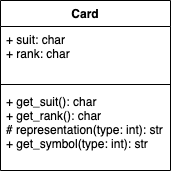

In [ ]:
## CARD CLASS

class Card:
    """
    Just a container for suit and rank values.
    Can return string representing those values as ASCII text or Unicode.
    Call get_symbol and pass the desired type.
    """

    def __init__(self, suit, rank):
        if (suit in SUITS) and (rank in RANKS):
            self.suit = suit
            self.rank = rank
        else:
            self.suit = None
            self.rank = None
            print ("Invalid card: ", suit, rank)

    def get_suit(self):
        return self.suit

    def get_rank(self):
        return self.rank

    def __str__(self):
        return self._representation(1)

    def _representation(self, type=1):
        if type == 1:
            return self.suit + self.rank
        if type == 2:
            symbols = ('♠', '♥', '♦', '♣')
            return symbols[SUITS.index(self.suit)] + self.rank
        if type == 3:
            first_unicode_card = 0x0001F0A1
            card_unicode = first_unicode_card + RANKS.index(self.rank)
            if RANKS.index(self.rank) >= 11:
                card_unicode += 1
            card_unicode += SUITS.index(self.suit) * 16
            return chr(card_unicode)
        if type == 4:
            return chr(0x0002592) * 2
        if type == 5:
            return chr(0x0001F0A0)
        print("Invalid type passed to Card-->_representation()")
        return None

    def get_symbol(self, type=2):
        """
        Returns 'symbol' representing the card's suit and rank.
        type = 1: returns "ST" for spade 10
        type = 2: returns "♣T" for spade 10
        type = 3: returns "🂪"  for spade 10
        type = 4: returns "▒▒" for any card (two characters representing back)
        type = 5: returns "🂠"  for any card (one Unicode card back symbol)
        """
        return self._representation(type)

Note how we check in initialization if the given parameters make a valid card. Robust checks at early stages reduce the time wasted in debugging in later stages of software development. As `__str__` is Python specific overload, used for early debugging only, we chose not to include it in UML class diagram.

Essentially, everything this class does is accept suit and rank, report error if those are invalid, return via methods suit and rank and return a 'symbol' representing the card. Notice how we want to give more options to the users of our class, so we allow different symbols to be returned depending on the `type` passed. By default it is set to 2.

<br>[back to top ↥](#t4p2toc)

<a id='t4p2tecard'></a>
##### **Test and Experiment**
Let's make some card objects and see how they work. Feel free to add more of your own.

In [ ]:
c1 = Card('S', 'A')   # ace of spades
c2 = Card('H', '2')   # two of hearts
c3 = Card('D', '5')   # five of diamonds
c4 = Card('C', 'T')   # ten of clubs
c5 = Card('H', 'Q')   # queen of hearts

Try passing non-existent rank / suit values.

In [ ]:
w1 = Card('s', '2')      # suit should be upcase
w2 = Card('H', 'three')  # rank written as text
w3 = Card('D', 3)        # integer passed as rank

Use `get` methods to get suit, rank or both. 

In [ ]:
print(c1.get_suit())
print(c2.get_rank())
print(c3.get_suit(), c3.get_rank())

These methods can be used by game logic to identify what card is that and how to process it. But, for a human, a different formatting is preferred. For that purpose, we use `get_symbol` method. <br> **Important:** we **don't** to **print** the card directly from this class. Doing so would limit our options later, when making the game, and deciding how to format the output. Therefore, we only need to return a string that is ready for printing.

In [ ]:
print(c1.get_symbol())
print(c2.get_symbol())
print(c3.get_symbol())

Try using types 1 - 3.

In [ ]:
print(c1.get_symbol(1))
print(c1.get_symbol(2))
print(c1.get_symbol(3))
print()

print(c2.get_symbol(1))
print(c2.get_symbol(2))
print(c2.get_symbol(3))
print()

print(c3.get_symbol(1))
print(c3.get_symbol(2))
print(c3.get_symbol(3))
print()

Tip: aim to design your classes modular and scalable. Perhaps a game will require to print a card with face down? For that, we included types 4 and 5.

In [ ]:
print(c1.get_symbol(4))
print(c1.get_symbol(5))
print()

print(c2.get_symbol(4))
print(c2.get_symbol(5))
print()

print(c3.get_symbol(4))
print(c3.get_symbol(5))
print()

Keep experimenting on your own.

<br>[back to top ↥](#t4p2toc)

<a id='t4p2deck'></a>
#### **▇▂ `Deck` Class ▂▂**
`Deck` class is just a container to store `Card` objects, therefore the natural relation between `Deck` and `Card` classes is **aggregation**.

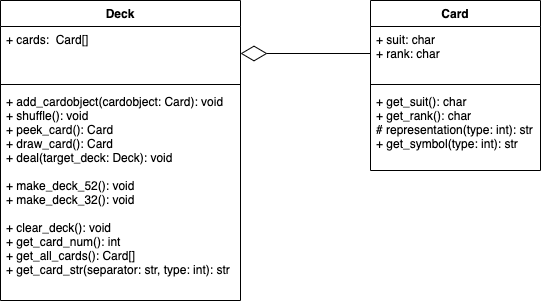

As can be seen from UML diagram above, `Deck` class contains an attribute `cards` which is a list of `Card` objects. The rest are the methods to add, remove or manage cards on the deck.

To add a card `add_cardobject()` is used, which takes a `Card` object and appends it to `cards` list. To get a card, there are two methods. `peek_card()` will return the first `Card` object in the list, but not remove it, while `draw_card()` also returns the first `Card` object, but removes it from the list. Those can be combined in `deal()` method, that will remove the first `Card` object from one `Deck` and append it at the end of another. `shuffle()` is used to shuffle the order of `Card` objects in `cards`.

Since we expect most of the operations with `Deck` will start by making either a 52 or 32 card deck, two methods `make_deck_52()` and `make_deck_32()` are added to speed up that task.

Finally, we have maintenance methods: `clear_deck()`, `get_card_num()`, `get_all_cards()` and for printing and debugging `get_card_str()`.

In [ ]:
# random module is needed for shuffle
import random as rnd

## DECK CLASS

class Deck:
    """ Container for CARD objects """

    def __init__(self):
        self.cards = []

    def add_cardobject(self, cardobject):
        self.cards.append(cardobject)

    def make_deck_52(self):
        self.cards = []
        for s in SUITS:
            for r in RANKS:
                new_card = Card(s, r)
                self.add_cardobject(new_card)

    def make_deck_32(self):
        self.cards = []
        for s in SUITS:
            for r in RANKS[6:]:
                new_card = Card(s, r)
                self.add_cardobject(new_card)

    def clear_deck(self):
        self.cards = []

    def get_card_num(self):
        return len(self.cards)

    def get_all_cards(self):
        """ returns card object array that can be iterated by other functions """
        return self.cards

    def get_card_str(self, separator = ' ', type = 2):
        """
        Returns all cards as a string ready for printing.
        Choose separator and type (1-5) to format the output.
        """
        return separator.join([c.get_symbol(type) for c in self.cards])

    def __str__(self):
        return self.get_card_str(type=1)

    def shuffle(self):
        rnd.shuffle(self.cards)

    def peek_card(self):
        """ Get the first card from the deck, but DO NOT remove it. """
        if len(self.cards) > 0:
            return self.cards[0]
        return None

    def draw_card(self):
        """ Get the first card from the deck and remove it. """
        if len(self.cards) > 0:
            return self.cards.pop(0)
        return None

    def deal(self, target_deck):
        """ Removes the first card from the deck and adds it to the target. """
        if len(self.cards) > 0:
            target_deck.add_cardobject(self.draw_card())

<br>[back to top ↥](#t4p2toc)

<a id='t4p2tedeck'></a>
##### **Test and Experiment**

Create a deck and add previously created cards c1-c5 to it. Then, print the deck.

In [ ]:
deck = Deck()
deck.add_cardobject(c1)
deck.add_cardobject(c2)
deck.add_cardobject(c3)
deck.add_cardobject(c4)
deck.add_cardobject(c5)

print(deck.get_card_str())

Print the same deck again with type = 3 and type = 5.

In [ ]:
print(deck.get_card_str(type=3))
print(deck.get_card_str(type=5))

Next, create 52 and 32 card decks and print all cards with print type of your choosing.

In [ ]:
d52 = Deck()
d52.make_deck_52()
print(d52.get_card_str(type=3))

In [ ]:
d32 = Deck()
d32.make_deck_32()
print(d32.get_card_str(separator="",type=3))

Try shuffling d52. If cards are not easily visible, switch to type=2.

In [ ]:
d52.shuffle()
print(d52.get_card_str(type=3))

Print the number of cards in the first deck and d52. Then deal 3 cards from d52 to the first deck. Print the number of cards afterwards and the contents of those decks.

In [ ]:
print("Deck 'deck' contain", deck.get_card_num(),"cards.")
print("Deck 'd52' contain", d52.get_card_num(),"cards.")

print("\n","-"*30,"\n\tDealing 3 cards.\n","-"*30,"\n")
for _ in range(3):
    d52.deal(deck)
    
print("Deck 'deck' contain", deck.get_card_num(),"cards.")
print("Deck 'd52' contain", d52.get_card_num(),"cards.")

print("\n","-"*30,"\n\tDeck 'deck'\n","-"*30,"\n")
print(deck.get_card_str(type=3))

print("\n","-"*30,"\n\tDeck d52\n","-"*30,"\n")
print(d52.get_card_str(type=3))

Keep experimenting on your own.

<br>[back to top ↥](#t4p2toc)

<a id='t4p2hand'></a>
#### **▇▂ `Hand` Class ▂▂**
We will further customize `Deck` class for the specific purposes of blackjack game and call it `Hand` class. As we have pretty much everything needed in `Deck` already, we will only add a method `get_value()` to return the number of points of that hand, according to blackjack rules, and two methods to directly print to the console, as this is the final class, which will be exposed to the user. <br>
For possible extensions in the future, we added the attribute `name`.

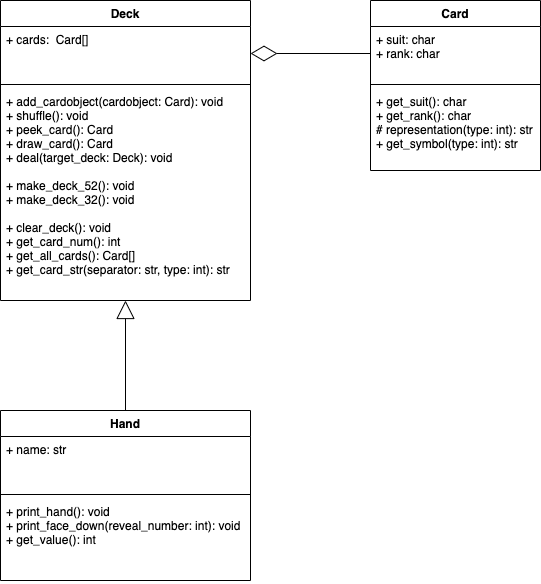

In [ ]:
## HAND CLASS

class Hand(Deck):
    """
    Extended deck class for Blackjack game.
    Added methods for easier printing and value calculation of a hand.
    """

    def __init__(self, name):
        super().__init__()
        self.name = name

    def print_hand(self):
        """ Prints all cards in the hand to the console. Uses type=2. """
        print("{}'s cards:".format(self.name))
        if len(self.cards) > 0:
            print(self.get_card_str(separator=' ', type=2))
        else:
            print("(empty)")

    def print_face_down(self, reveal_number = 1):
        """
        Prints all cards face down, except the first reveal_number cards.
        Uses type=2 for face up and type=4 for face down.
        """
        separator = ' '
        face_up = separator.join(
            [c.get_symbol(2) for c in self.cards[:reveal_number]])
        face_down = separator.join(
            [c.get_symbol(4) for c in self.cards[reveal_number:]])

        print("{}'s cards:".format(self.name))
        print(face_up + separator + face_down)

    def get_value(self):
        """ Returns BlackJack value of a hand. """
        val = 0
        has_ace = False
        for c in self.cards:
            if VALUES[c.get_rank()] == 1:
                has_ace = True
            val += VALUES[c.get_rank()]

        if has_ace and (val <= 21-10):
            val += 10
        return val

<br>[back to top ↥](#t4p2toc)

<a id='t4p2tehand'></a>
##### **Test and Experiment**
Recreate 52 card deck. Create 3 players. Deal few cards to each player and print their hands, as well as blackjack hand values.

In [ ]:
# making a new 52 card deck and shuffling it
d52 = Deck()
d52.make_deck_52()
d52.shuffle()

# creating 3 players
ply1 = Hand("Andrej")
ply2 = Hand("Babak")
ply3 = Hand("Aleksandra")

# deal 3 cards to ply1, 2 cards to ply2 and 4 cards to ply3
for _ in range(3): d52.deal(ply1)
for _ in range(2): d52.deal(ply2)
for _ in range(4): d52.deal(ply3)

# print contents of hand; check if value is calculated correctly
ply1.print_hand()
print("ply1 hand value:", ply1.get_value())
print()
ply2.print_hand()
print("ply2 hand value:", ply2.get_value())
print()
ply3.print_hand()
print("ply3 hand value:", ply3.get_value())
print()

Make sure to test special cases and outliers. In this example, those are hands containing aces.

In [ ]:
card1 = Card('S', 'A')
card2 = Card('H', 'A')
card3 = Card('D', '3')
card4 = Card('C', '7')
card5 = Card('C', 'A')
card6 = Card('D', 'K')

In [ ]:
test1 = Hand("test1")
test1.add_cardobject(card1)
test1.add_cardobject(card3)
test1.add_cardobject(card4)

test1.print_hand()
print(test1.get_value())

In [ ]:
test1.add_cardobject(card2)

test1.print_hand()
print(test1.get_value())

In [ ]:
test2 = Hand("test2")

test2.add_cardobject(card3)
test2.add_cardobject(card4)
test2.add_cardobject(card6)
test2.add_cardobject(card2)

test2.print_hand()
print(test2.get_value())

Depending on the situation, you may want to reveal only some cards and print others as face down. For that purpose, `print_face_down()` method is used. It expects an integer used to determine the first *n* number of cards to be printed as face up. Every other card from *n+1* will be printed face down.

In [ ]:
ply1.print_face_down() # default value

ply2.print_face_down(1000000) # big number on purpose to test if it breaks the method

ply3.print_face_down(3) # reveal first 3 cards
ply3.print_face_down(0) # print all cards as face down

Keep experimenting on your own.

<br>[back to top ↥](#t4p2toc)

<a id='t4p2game'></a>
#### **▇▂ `Game` Class ▂▂**
We will reuse `Game` template class from the previous mini-project (Guess the number game). It is copy-pasted here for further reference.

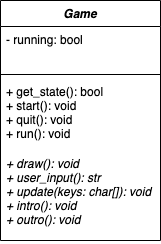

In [ ]:
class Game:
    """
    Game is a base, template class, implementing a simple game loop.
    Create a child class and override the needed methods.
    """
    def __init__(self):
        self.__running = True

    def get_state(self):
        return self.__running

    def start(self):
        """ Internal message to start the game. """
        self.__running = True

    def quit(self):
        """ Internal message to end the game. """
        self.__running = False

    def draw(self):
        pass

    def user_input(self):
        """ Expects input from the user and returns the result. Override."""
        print("Enter Q or QUIT to terminate the game")
        res = input("Please enter your command:")
        return res

    def update(self, keys):
        """ Processes given input. By default quits on Q or QUIT. Override. """
        if keys.upper() == "QUIT" or keys.upper() == "Q":
            self.__running = False

    def intro(self):
        """
        The first method to be called (once) when the game starts. Override.
        """
        pass

    def outro(self):
        """ The last method to be called (once) when the game ends. Override. """
        pass

    def run(self):
        """
        The main 'workhorse' method.
        Calls all other methods according to the game loop.
        """
        self.intro()
        while self.__running:
            self.draw()
            usr = self.user_input()
            self.update(usr)
        self.outro()

<br>[back to top ↥](#t4p2toc)

<a id='t4p2assembling'></a>
#### **▇▂ Assembling the Pieces Together ▂▂**
All that is left to do is assemble the pieces together and make a new `Blackjack` class, that will be used to play the game.

To organize input and possible decision both human and computer (dealer) can do, let us see how the game is player. First, two cards are dealt to player and dealer. Player's cards are given as face up, while dealer only reveals the first card. Then, the player has the option to either **HIT** or **STAND**. If **HIT** was selected, the player will be dealt another card and then the choice goes to the dealer, who can also choose one of the two option. Once either chooses to **STAND** that player will no longer be drawing cards. If anyone goes over 21, it is considered a **BUST** and that entity automatically loses and can no longer draw cards. When everyone stops getting the cards, either by **STAND**ing or **BUST**ing, the game ends, and the entity with the most points, up to and including 21, wins.

The dealer's choice depends on the cards of the player. If player goes over 21 (**BUSTED**), the dealer will no longer be drawing cards and will choose to **STAND**. Else, if dealer's hand is worth less than 17 points, he will choose to **HIT**. Otherwise, the dealer's choice will be to **STAND**.

We can implement this easily as an extension to our `Hand` class.

In [ ]:
## Implementation of dealer specific for our blackjack game logic

class Dealer(Hand):
    def __init__(self):
        super().__init__("dealer")

    def choice_hit(self):
        return True if self.get_value() < 17 else False

Similar to GuessTheNumber game, we implemented in the previous mini-project, we can implement `Blackjack` class, by inheriting from `Game` class template, and overriding the methods as needed.

The design we have chosen is given in the class diagram below.

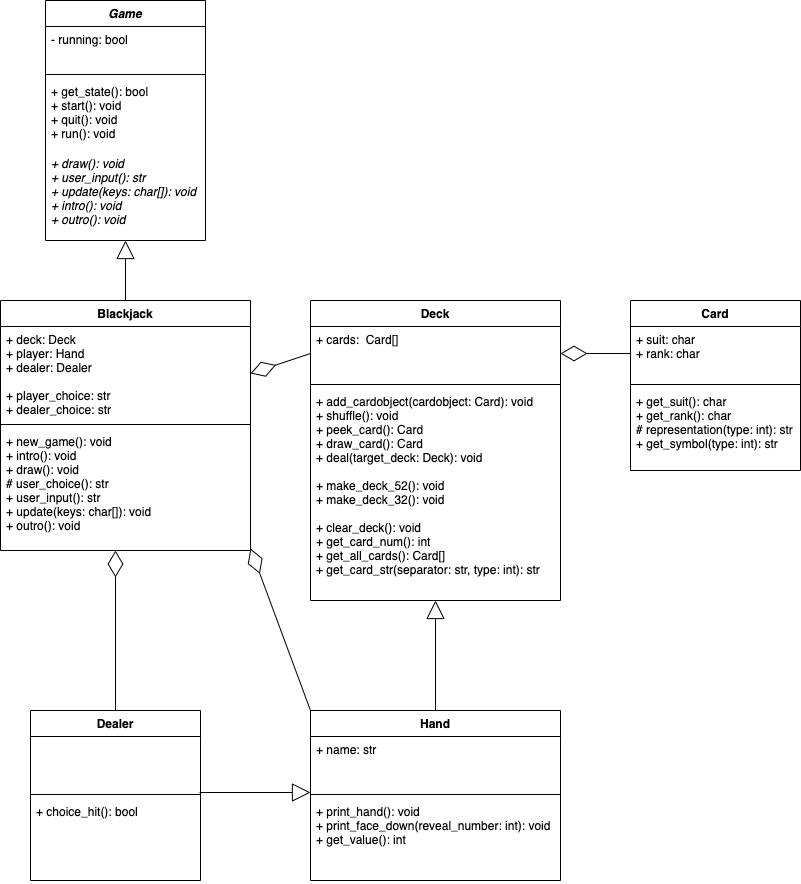

If you can, try to implement the game based on the suggested design. The comments in the code are meant to guide you, but feel free to take a different approach if you prefer.

In [ ]:
## TO BE IMPLEMENTED

class Blackjack(Game):
    def __init__(self):
        # implement initialization
        # Assign and initialize deck, player and dealer

    def new_game(self):
        """ Resets all game objects to starting values. """
        # This method will be called by intro(), but can also be used independently to restart the game
        
        # Set game flag to running.
        # Clear all aggregated objects from values of the previous game.
        # Make and shuffle 52 card deck
        # Deal 2 cards to player and dealer (one at a time)        
        # ... implement ...
        
        # we will use these flags to track previous choices
        # (if entity picks STAND, that entity will not be asked to make a choice for the rest of the game)
        self.player_choice = ""
        self.dealer_choice = ""

    def intro(self):
        """ OVERRIDDEN: displays instructions and restarts the game """
        # print game instructions
        # print()
        # ... add what is needed ...
        
        # call new game (resets all game objects)
        self.new_game()

    def draw(self):
        """ OVERRIDDEN: draw game objects in console """
        # output (print) cards from dealer and player
        # dealer reveals only the first card
        
        # ... implement ...

    def _user_choice(self):
        """ helper function to process user input """
        # this method was taken out of user_input() to make in clearer
        # it sets valid choices, presents them to the player, and loops until one is selected.
        # then it returns a string representing the player's choice: "HIT" or "STAND"
        # It is a good practice to let player terminate the game as he pleases, so add "QUIT" choice as well.
        
        # define valid input characters
        # ... implement ...

        # show user valid choices and keep in loop until one is given
        # ... implement ...

        # set player's choice flag according to the input
        # ... add what is missing and implement ...
        #if ... return "HIT"
        #if ... return "STAND"
        #if ... return "QUIT"

    def user_input(self):
        """
        OVERRIDDEN: get and process user's input.
        Note: this function is to be called until user chooses STAND.
        If that happens, dealer plays as much as he wants according to his logic
        """
        # If the previous choice was not STAND, ask user for a new choice
        # and set the flag accordingly (call _user_choice())
        # ... implement ...
        
        # This method is also expected to return a value (string)
        # so return the same flag (str value) you have set just above
        # ... implement ...

    def update(self, keys):
        """
        OVERRIDDEN: updates the game according to the choices user and
        dealer made
        """
        # deal one more card to the player if HIT was selected
        # ... implement ...

        # dealer doesn't play if user busted
        # if not, call dealer's choice and update the flag accordingly
        # ... implement ...
            
        # if dealer opted to draw one more card, deal it
        # ... implement ...

        # check conditions to stop the game
        # 1 - user terminated the game; 2 - both players chose to STAND
        # 3 - player BUSTED
        # stop the game by sending the appropriate message (to change 'running' flag)
        # ... implement ...

    def outro(self):
        """ OVERRIDDEN: prints cards, points and announces winner """
        # Announce that the game has ended
        # Print cards of dealer and player
        
        # Determine who wins and how (by points, opponent busted, ...)
        # Display points and the outcome

<br>[back to top ↥](#t4p2toc)

<a id='t4p2blackjack'></a>
#### **▇▂ `Blackjack` Class - Solution ▂▂**
It is critical that you are able to solve the problem on your own. Remember, software design doesn't have absolute right or wrong. Some designs have advantages in terms of implementation, other for maintenance, some others for scalability and so on. You learn by trial and error. Practice through coding.

After you are successful, compare your approach with the one we took.

In [ ]:
## BLACKJACK CLASS

class Blackjack(Game):
    def __init__(self):
        super().__init__()
        self.deck = Deck()
        self.player = Hand("player")
        self.dealer = Dealer()

    def new_game(self):
        """ Resets all game objects to starting values. """
        # set game flag: running = True
        self.start()

        # clear decks if used in the previous game
        self.player.clear_deck()
        self.dealer.clear_deck()
        self.deck.clear_deck()
        # make a new 52 card deck and shuffle it
        self.deck.make_deck_52()
        self.deck.shuffle()

        # Deal two cards to player and dealer. One at a time to each.
        for _ in range(2):
            self.deck.deal(self.player)
            self.deck.deal(self.dealer)

        # set flags to be read by game logic later.
        self.player_choice = ""
        self.dealer_choice = ""

    def intro(self):
        """ OVERRIDDEN: displays instructions and restarts the game """
        # print game instructions
        print("Welcome to Blackjack!\n")
        print("Your objective is to beat the dealer's hand.")
        print("Aces count as 1 or 11 (whatever is more favourable).")
        print("The hand with higher value wins.")
        print("Values over 21 are considered as BUST.\n\n")

        # call new game (resets all game objects)
        self.new_game()

    def draw(self):
        """ OVERRIDDEN: draw game objects in console """
        # output cards from dealer and player
        # dealer reveals only the first card
        self.dealer.print_face_down(1)
        self.player.print_hand()
        print()

    def _user_choice(self):
        """ helper function to process user input """
        # define valid input characters
        hit_choices = ('1', 'H', 'HIT')
        stand_choices = ('2', 'S', 'STAND')
        quit_choices = ('0', 'Q', 'QUIT')
        valid_choices = hit_choices + stand_choices + quit_choices

        # show user valid choices and keep in loop until one is given
        choice = ""
        while not choice.upper() in valid_choices:
            print("Please enter your choice:")
            print("(1) - Hit")
            print("(2) - Stand")
            print("-----------")
            print("(0) - Quit")
            choice = input()

        # set player's choice flag according to the input
        if choice.upper() in hit_choices: return "HIT"
        if choice.upper() in stand_choices: return "STAND"
        if choice.upper() in quit_choices: return "QUIT"

    def user_input(self):
        """
        OVERRIDDEN: get and process user's input.
        Note: this function is to be called until user chooses STAND.
        If that happens, dealer plays as much as he wants according to his logic
        """
        # If the previous choice was not STAND, ask user for a new choice
        # and set the flag accordingly
        if not (self.player_choice == "STAND"):
            self.player_choice = self._user_choice()
        return self.player_choice

    def update(self, keys):
        """
        OVERRIDDEN: updates the game according to the choices user and
        dealer made
        """
        # deal one more card to the player if HIT was selected
        if self.player_choice == "HIT": self.deck.deal(self.player)

        # dealer doesn't play if user busted
        # if not, call dealer's choice and update the flag accordingly
        self.dealer_choice = "STAND"
        if self.player.get_value() <= 21 and self.dealer.choice_hit():
            # dealer opted to draw one more card
            self.dealer_choice = "HIT"
            self.deck.deal(self.dealer)

        # check conditions to stop the game
        # 1 - user terminated the game; 2 - both players chose to STAND
        # 3 - player BUSTED
        if keys == "QUIT": self.quit()
        if self.player_choice == "STAND" and self.dealer_choice == "STAND":
            self.quit()
        if self.player.get_value() > 21: self.quit()

    def outro(self):
        """ OVERRIDDEN: prints cards, points and announces winner """
        print("\nThe game ended.\n")
        self.dealer.print_hand()
        self.player.print_hand()
        print()

        if self.player.get_value() > 21:
            print("Player busted! Dealer wins.")
        elif self.dealer.get_value() > 21:
            print("Dealer busted! Player wins.")
        elif self.player.get_value() > self.dealer.get_value():
            print("Dealer scores {}, player scores {}. Player wins.".format(
                self.dealer.get_value(), self.player.get_value()))
        else:
            print("Dealer scores {}, player scores {}. Dealer wins.".format(
                self.dealer.get_value(), self.player.get_value()))

Run the game and enjoy the spoils of your hard work!

In [ ]:
game = Blackjack()
game.run()

<br>[back to top ↥](#t4p2toc)